# Predicting "total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum" from date 

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("../COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(50_000)
data = data[['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum', 'state', 'city', 'is_metro_micro', 'collection_week']]

C:\Users\derek\AppData\Local\Temp\ipykernel_19720\1737227347.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(50_000)


In [21]:
data = data.sort_values(['state', 'city', 'collection_week'])
data

,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,state,city,is_metro_micro,collection_week
7327,NaN,AK,ANCHORAGE,True,2020/03/27
4120,NaN,AK,ANCHORAGE,True,2020/04/10
2207,NaN,AK,ANCHORAGE,True,2020/04/17
1934,NaN,AK,ANCHORAGE,True,2020/04/24
13002,NaN,AK,ANCHORAGE,True,2020/06/05
...,...,...,...,...,...
4317,NaN,WY,WORLAND,False,2020/05/22
29348,7.0,WY,WORLAND,False,2020/10/02
32269,19.0,WY,WORLAND,False,2020/11/27
35296,0.0,WY,WORLAND,False,2021/04/30


## Clean data and use WA as example

In [22]:
def ifZero(x):
    if x < 0:
        return 0
    return x

In [51]:
clean = data.dropna()
clean['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'] = clean['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'].apply(ifZero)
clean

C:\Users\derek\AppData\Local\Temp\ipykernel_19720\3961722853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'] = clean['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'].apply(ifZero)


,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,state,city,is_metro_micro,collection_week
37565,20.0,AK,ANCHORAGE,True,2020/07/10
38128,126.0,AK,ANCHORAGE,True,2020/08/14
30710,65.0,AK,ANCHORAGE,True,2020/08/21
31577,0.0,AK,ANCHORAGE,True,2020/09/25
35069,225.0,AK,ANCHORAGE,True,2020/11/06
...,...,...,...,...,...
31209,4.0,WY,WHEATLAND,False,2023/01/20
29348,7.0,WY,WORLAND,False,2020/10/02
32269,19.0,WY,WORLAND,False,2020/11/27
35296,0.0,WY,WORLAND,False,2021/04/30


### For testing puposes, get all washington

In [61]:
wa_data = clean.drop(['city', 'is_metro_micro'], axis=1)
wa_data = wa_data[wa_data["state"] == "WA"]
wa_data.collection_week = pd.to_datetime(wa_data.collection_week)
wa_data

,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,state,collection_week
37428,24.0,WA,2022-06-17
39346,16.0,WA,2022-09-02
37169,16.0,WA,2022-09-16
31263,0.0,WA,2020-08-21
26771,0.0,WA,2020-09-04
...,...,...,...
36714,55.0,WA,2020-11-06
33731,185.0,WA,2022-01-07
30680,22.0,WA,2022-03-25
35880,131.0,WA,2022-07-29


## Now lets do some ML!

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [69]:
X = np.array(wa_data.collection_week)
y = np.array(wa_data.total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum)
X

array(['2022-06-17T00:00:00.000000000', '2022-09-02T00:00:00.000000000',
       '2022-09-16T00:00:00.000000000', '2020-08-21T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2020-10-23T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2022-03-04T00:00:00.000000000',
       '2022-04-22T00:00:00.000000000', '2022-08-19T00:00:00.000000000',
       '2022-10-14T00:00:00.000000000', '2021-09-10T00:00:00.000000000',
       '2022-04-01T00:00:00.000000000', '2022-10-21T00:00:00.000000000',
       '2022-07-29T00:00:00.000000000', '2022-12-23T00:00:00.000000000',
       '2021-06-25T00:00:00.000000000', '2021-08-13T00:00:00.000000000',
       '2022-06-24T00:00:00.000000000', '2021-07-09T00:00:00.000000000',
       '2022-10-07T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2022-11-11T00:00:00.000000000', '2021-04-02T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2022-03-04

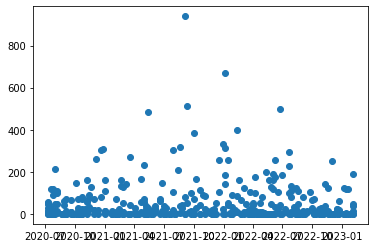

In [79]:
plt.scatter(X, y)

In [74]:
regr = LinearRegression()
regr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()